![Bellabeat Logo](bellabeat_logo.png)
# Bellabeat Case Study: How Can a Wellness Technology Company Play It Smart?
**Google Data Analytics Professional Certificate Capstone Project**
***

## Background
Bellabeat is a high-tech company that manufactures health-focused smart products for women. Its elegantly designed products provide users with valuable health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. Since its founding in 2013, Bellabeat has grown rapidly, establishing itself as a tech-driven brand in women's wellness.

The main focus of the case is to analyze smart device fitness data to determine new growth opportunities and help Bellabeat become a larger player in the global smart device market. We will focus on the Bellabeat app, one of the company's products that connects to its line of smart wellness devices.

The case study follows the six-step data analysis process: *Ask, Prepare, Process, Analyze, Share, and Act.*

## 1. Ask
***

### Business Task
Analyze Fitbit usage data to gain insights into how consumers are using non-Bellabeat smart devices, identify growth opportunities, and inform Bellabeat's marketing strategy.

> #### Guiding Questions
> 1. What are some trends in smart device usage?
> 2. How could these trends apply to Bellabeat customers?
> 3. How could these insights help influence Bellabeat's marketing strategy?

### Key Stakeholders
- Urška Sršen: co-founder and Chief Creative Officer
- Sando Mur: co-founder and key member of the Bellabeat executive team
- Bellabeat marketing analytics team

## 2. Prepare
***

### Data Source
[Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit): This dataset, publicly available by Mobius, was collected via a distributed survey on Amazon Mechanical Turk between 03/12/2016 and 05/12/2016. Stored across 18 CSV files, it comprises personal fitness tracker data from 30 Fitbit users who provided their consent. The dataset includes metrics similar to those from Bellabeat products, such as minute-level output for physical activity, heart rate, sleep, and step count.

### Dataset Limitations
Upon review, a few limitations were identified that could impact the analysis:
- **Outdated Data**: The data was collected in 2016, limiting its relevance for analyzing current trends in consumer behavior and daily habits. Additionally, the data provided covers only the period from 4/12/2016 and 05/12/2016 (31 days), rather than the full date range mentioned. This short time frame may not adequately capture broader consumer habits or seasonal trends.
- **Inconsistent User Count**: Using ```=COUNTA(UNIQUE())``` in Excel revealed a user ID count of 33, instead of the stated 30. A larger sample size would be more representative of the population and increase the confidence level of the analysis. 
- **Lack of Demographics**: The dataset does not include demographic details such as gender, age, and location, restricting the ability to draw meaningful conclusions for different user groups. This limitation is particularly significant for a women-centric wellness company such as Bellabeat.
- **Device and Behavior Variability**: Differences between Fitbit tracker models, individual tracking behaviors, and personal preferences will affect the recorded outputs. For example, there are data gaps due to inconsistencies in device usage, which have affected metrics such as sleep and weight log data. Users did not consistently use their devices, so most days do not have all 33 user data.
- **Originality**: The data was collected via Amazon Mechanical Turk rather than directly from Fitbit (ex: Fitbit Web API), raising potential concerns about its originality and credibility.

## 3. Process
***

Python was utilized to clean, manipulate, and analyze the data, leveraging the ```pandas```, ```datetime```, ```matplotlib```, ```NumPy```, ```seaborn```, and ```SciPy``` packages.

Once the data was observed and familiarized, it was processed:
- The main data frame has 940 rows and 15 columns.
- There are 33 unique IDs (more than the expected 30). *sleep_day* and *weight_log* data frames are missing many users, likely due to user tracking habits.
- *ActivityDate* in each data frame was converted to a ```datatime64``` dtype. The date format was also converted to ```yyyy-mm-dd```.
- A new *DayOfTheWeek* column was created for further analysis.
- *ActiveMinutes* and *TotalMinutes* columns were created by combining the separate intensity minutes columns.

In [9]:
# Import libraries
import pandas as pd
import datetime as dt

In [11]:
# Import relevant data files by reading CSV files
# Some files were excluded after review due to their lack of relevance to the specific analysis or having duplicate data
daily_activity = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourly_calories = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep_day = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log = pd.read_csv(r"Fitbit Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [42]:
daily_calories.head(5)

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


Checking for duplicate data: the *Calories* column in the *daily_activity* table seems to match those of the *Calories* column in the *daily_calories* table.

In [15]:
# Check data tables for duplicate data
# Merge calories and daily activity dataframes
merged_calories = daily_activity.merge(
    daily_calories,
    left_on=['Id', 'ActivityDate'], 
    right_on=['Id', 'ActivityDay'], 
    suffixes=('', '_other')
)
                         
# Check if Calorie values match
calories_match = (merged_calories['Calories'] == merged_calories['Calories_other']).all()
if calories_match:
    print("Calorie values match for all records.")
else:
    print("Calorie values do not match for some records.")

Calorie values match for all records.


Repeating the code above for *daily_steps* and *daily_intensities*, both tables matched all records as well. Therefore, those files were dropped.

### Preview Data

In [21]:
# Rename daily_activity as it will be analyzed the most
df = daily_activity

In [23]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [484]:
print("Count of unique users:", df['Id'].nunique())

Count of unique users: 33


Unique users in *hourly_calories*, *hourly_intensities*, and *hourly_steps* are all also 33.

In [486]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [488]:
print("Count of unique users:", sleep_day['Id'].nunique())

Count of unique users: 24


In [490]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [492]:
print("Count of unique users:", weight_log['Id'].nunique())

Count of unique users: 8


There is a total of 33 unique users. *sleep_day* and *weight_log* tables have less, most likely due to user tracking habits.

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [496]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [498]:
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


### Data Cleaning and Manipulation

#### 1. Check for and remove duplicates

In [88]:
# Checking to see if any columns have duplicates
print("daily_activity has", df.duplicated().sum(), "duplicates")
print("sleep_day has ", sleep_day.duplicated().sum(), "duplicates")

daily_activity has 0 duplicates
sleep_day has  0 duplicates


In [50]:
# Drop duplicates
df = df.drop_duplicates()
hourly_calories = hourly_calories.drop_duplicates()
hourly_intensities = hourly_intensities.drop_duplicates()
hourly_steps = hourly_steps.drop_duplicates()
sleep_day = sleep_day.drop_duplicates()
weight_log = weight_log.drop_duplicates()

In [54]:
print("sleep_day has", sleep_day.duplicated().sum(), "duplicates now")

sleep_day has 0 duplicates now


#### 2. Clean null or blank values

In [438]:
df.isnull().sum()
hourly_calories.isnull().sum()
hourly_intensities.isnull().sum()
hourly_steps.isnull().sum()
sleep_day.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [508]:
# did not remove column because Fat is not relevant to this analysis
# did not use .fillna()/.dropna() because we still want to look at other data for each record
weight_log.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

#### 3. Standardize the data and fix errors

In [56]:
# Convert ActivityDate data type to date
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format="%m/%d/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [60]:
# Repeat on other tables
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
weight_log['Date'] = pd.to_datetime(weight_log['Date'], format='%m/%d/%Y %I:%M:%S %p')

#### 4. Create new columns for further analysis + remove any columns that are not necessary

In [62]:
# Get days of week
df.insert(loc=2, column='DayOfWeek', value=df['ActivityDate'].dt.day_name())

In [64]:
# Separate date and time
hourly_steps['ActivityDate'] = pd.to_datetime(hourly_steps['ActivityHour'].dt.date)
# hourly_steps['Time'] = hourly_steps['ActivityHour'].dt.time
hourly_steps['Time'] = hourly_steps['ActivityHour'].dt.hour

# No new column made for time because all are recorded at 00:00:00
sleep_day['SleepDate'] = pd.to_datetime(sleep_day['SleepDay'].dt.date)

# Remove old datetime columns and reorganize dataframe
hourly_steps = hourly_steps[['Id', 'ActivityDate', 'Time', 'StepTotal']]
sleep_day = sleep_day[['Id', 'SleepDate', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']]

In [66]:
# Get total time the user uses the device
# Get active time the user uses the device
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']
df['ActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']

In [68]:
df.head(5)

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,ActiveMinutes
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,366
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,257
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,222
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,272
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,267


### Delete columns
There are various columns for distance such as *TotalDistance* and *TrackerDistance*. They have similar values, but we are not sure. We should also check if the total distance is equal to the sum of the different active distance columns.

In [538]:
df['SumDistance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']
df[['TotalDistance', 'TrackerDistance', 'SumDistance']]

,TotalDistance,TrackerDistance,SumDistance
0,8.500000,8.500000,8.49
1,6.970000,6.970000,6.97
2,6.740000,6.740000,6.75
3,6.280000,6.280000,6.23
4,8.160000,8.160000,8.16
...,...,...,...
935,8.110000,8.110000,8.08
936,18.250000,18.250000,18.19
937,8.150000,8.150000,8.09
938,19.559999,19.559999,19.52


In [540]:
df['LoggedActivitiesDistance'].max()

4.94214200973511

Not all data from *TotalDistance* and *TrackerDistance* are the same but most are. There are also data points where *LoggedActivitiesDistance* is not 0.0 which may be the difference between *Tracker* and *Total* Distance. These differences may occur because some activities may be manually logged. This sum of "active" distance columns is very similar to the *TotalDistance* column. 
Because we are not too sure and the values are very similar, we decided to keep *TotalDistance*. We also kept the individual activity level distances for potential analysis.

In [542]:
df.drop(['TrackerDistance', 'LoggedActivitiesDistance', 'SumDistance'], axis=1, inplace=True)

In [544]:
df.head()

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,ActiveMinutes
0,1503960366,2016-04-12,Tuesday,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,366
1,1503960366,2016-04-13,Wednesday,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,257
2,1503960366,2016-04-14,Thursday,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,222
3,1503960366,2016-04-15,Friday,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,272
4,1503960366,2016-04-16,Saturday,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,267


In [546]:
weight_log = weight_log.drop(columns=['WeightKg', 'Fat', 'LogId'])

## 4. Analyze 
***

In [548]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Available data overview

In [550]:
# Duration of data
print("Data time frame:", min(df['ActivityDate']),'to', max(df['ActivityDate']))
print("Date duration:", df['ActivityDate'].nunique(), 'days')

Data time frame: 2016-04-12 00:00:00 to 2016-05-12 00:00:00
Date duration: 31 days


In [552]:
# Lowest and highest count of logged days
user_activity_days = df.groupby('Id')['ActivityDate'].nunique()
# Make df to use for next analysis 
activity_count_df = user_activity_days.reset_index(name='activity_count')
# df['Id'].value_counts()

print("Lowest logged days by a user:", user_activity_days.min(), "days")
print("Highest logged days by a user:", user_activity_days.max(), "days")

Lowest logged days by a user: 4 days
Highest logged days by a user: 31 days


Some users are not recording their activity every day, influencing the results of the analysis.

In [554]:
# Missing days/data points
expected_entries = 31 # total number/max days
total_users = 33

# Get the missing points for each user
missing_entries_per_user = expected_entries - activity_count_df['activity_count']
# Add up those missing points to get total missing in dataset
missing = missing_entries_per_user.sum()
print("Missing days:", missing)

missing_percentage = missing/(total_users * expected_entries) * 100
print("Percentage of missing user data: " + str(round(missing_percentage, 2)) + "%")

Missing days: 83
Percentage of missing user data: 8.11%


In [556]:
# Daily hour usage status 
print("Max minutes recorded by user in a day:", df['TotalMinutes'].max())
# Count entries where total_minutes equals 1440 (24 hours)
count_equal_1440 = sum(df['TotalMinutes'] == 1440)

# Count entries where total_minutes is less than 1440
count_below_1440 = sum(df['TotalMinutes'] < 1440)

print("Days used for 24 hours:", count_equal_1440)
print("Days with usage under 24 hours:", count_below_1440)
percent_below_24 = (count_below_1440/(count_equal_1440 + count_below_1440)) * 100
print("Percentage of days used below 24 hours: " + str(round(percent_below_24, 2)) + "%")

Max minutes recorded by user in a day: 1440
Days used for 24 hours: 478
Days with usage under 24 hours: 462
Percentage of days used below 24 hours: 49.15%


Not all users are using their devices or recording throughout the whole day.

In [560]:
print("Day with lowest logged sleep:", sleep_day['SleepDate'].value_counts().min(), "users logged")
print("Day with highest logged sleep::", sleep_day['SleepDate'].value_counts().max(), "users logged")

Day with lowest logged sleep: 8 users logged
Day with highest logged sleep:: 17 users logged


In [340]:
user_sleep_days = sleep_day.groupby('Id')['SleepDate'].nunique()
print("Lowest logged sleep days by a user:", user_sleep_days.min())
print("Technically, 0 is the lowest since some users did not record at all")
print("Highest logged sleep days by a user:", user_sleep_days.max())

Lowest logged sleep days by a user: 1
Technically, 0 is the lowest since some users did not record at all
Highest logged sleep days by a user: 31


In [562]:
# Calculate average sleep duration for each user
avg_sleep = sleep_day.groupby('Id')['TotalMinutesAsleep'].mean()
avg_sleep

Id
1503960366    360.280000
1644430081    294.000000
1844505072    652.000000
1927972279    417.000000
2026352035    506.178571
2320127002     61.000000
2347167796    446.800000
3977333714    293.642857
4020332650    349.375000
4319703577    476.653846
4388161847    400.173913
4445114986    385.178571
4558609924    127.600000
4702921684    417.481481
5553957443    463.483871
5577150313    432.000000
6117666160    478.777778
6775888955    349.666667
6962181067    448.000000
7007744171     68.500000
7086361926    453.125000
8053475328    297.000000
8378563200    445.129032
8792009665    435.666667
Name: TotalMinutesAsleep, dtype: float64

These averages are not the best to use for comparison as some users may have only recorded a few days of sleep which may create outliers such as a low average.

In [564]:
# Count the number of times each user logged their weight
weight_log.groupby('Id')['Date'].count()

Id
1503960366     2
1927972279     1
2873212765     2
4319703577     2
4558609924     5
5577150313     1
6962181067    30
8877689391    24
Name: Date, dtype: int64

In [566]:
print("Lowest logged in a day:", weight_log['Date'].value_counts().min())
print("Highest logged in a day:", weight_log['Date'].value_counts().max())

Lowest logged in a day: 1
Highest logged in a day: 3


### Summary Statistics

In [568]:
df[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'TotalMinutes', 'ActiveMinutes']].describe().round(2)

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,ActiveMinutes
count,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00
mean,7637.91,5.49,1.50,0.57,3.34,0.00,21.16,13.56,192.81,991.21,2303.61,1218.75,227.54
std,5087.15,3.92,2.66,0.88,2.04,0.01,32.84,19.99,109.17,301.27,718.17,265.93,121.78
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00
25%,3789.75,2.62,0.00,0.00,1.95,0.00,0.00,0.00,127.00,729.75,1828.50,989.75,146.75
50%,7405.50,5.24,0.21,0.24,3.36,0.00,4.00,6.00,199.00,1057.50,2134.00,1440.00,247.00
75%,10727.00,7.71,2.05,0.80,4.78,0.00,32.00,19.00,264.00,1229.50,2793.25,1440.00,317.25
max,36019.00,28.03,21.92,6.48,10.71,0.11,210.00,143.00,518.00,1440.00,4900.00,1440.00,552.00


The average step count is **7,638**. The max step count is almost 5 times as much at **36,019**. The average total distance is **5.49 miles**. The average calories burned is **2,304** which is hard to interpret as it depends on many factors such as age and weight. Users spend on average **16.52 hours** being sedentary, **3.21 hours** being lightly active, and **0.58** hours (34.72 mins) being fairly and very active combined. There appear to be days when users do not record any movement or are not active at all, as indicated by the maximum sedentary minutes (24 hours). This can also skew the averages/data. The average time users are active per day (active minutes) is **3.79 hours**. This may be more accurate in analyzing as activity needs to be detected to record.

The max distance is 28.03 and the min is 0 mins which could be outliers to pay attention to later. The min value for *TotalMinutes* is also 2 which indicates users are not wearing for the whole day.

Although the *sleep_day* and *weight_log* datasets are missing data from many users, they can still provide valuable insights for analysis.

The average amount of total time recorded per day is **20.31 hours**. With 16.52 hours of those hours being sedentary. This suggests that some users may wear the watch while they sleep but do not record it or the device may not accurately detect all sleep instances.

In [570]:
sleep_day['MinutesToFallAsleep'] = sleep_day['TotalTimeInBed'] - sleep_day['TotalMinutesAsleep']

In [572]:
sleep_day[['TotalSleepRecords','TotalMinutesAsleep', 'TotalTimeInBed', 'MinutesToFallAsleep']].describe().round(2)

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,MinutesToFallAsleep
count,410.00,410.00,410.00,410.00
mean,1.12,419.17,458.48,39.31
std,0.35,118.64,127.46,46.71
min,1.00,58.00,61.00,0.00
25%,1.00,361.00,403.75,17.00
50%,1.00,432.50,463.00,25.50
75%,1.00,490.00,526.00,40.00
max,3.00,796.00,961.00,371.00


Users get on average **6.99 hours** of sleep while spending on average **7.64 hours** in bed. It takes on average 39.31 minutes for them to fall asleep once in bed. They sleep on average 1.12 times per day.

In [574]:
weight_log[['WeightPounds', 'BMI']].describe().round(2)

,WeightPounds,BMI
count,67.00,67.00
mean,158.81,25.19
std,30.70,3.07
min,115.96,21.45
25%,135.36,23.96
50%,137.79,24.39
75%,187.50,25.56
max,294.32,47.54


The average weight is **158.81 pounds**, and the average BMI is **25.19**. However, this information lacks significant relevance without accompanying demographic details, such as gender and age.

### Correlations

In [576]:
# Activity vs. Calories
print("Correlation between SedentaryMinutes and Calories:", df['SedentaryMinutes'].corr(df['Calories']).round(2))
print("Correlation between LightlyActiveMinutes and Calories:", df['LightlyActiveMinutes'].corr(df['Calories']).round(2))
print("Correlation between FairlyActiveMinutes and Calories:", df['FairlyActiveMinutes'].corr(df['Calories']).round(2))
print("Correlation between VeryActiveMinutes and Calories:", df['VeryActiveMinutes'].corr(df['Calories']).round(2))

Correlation between SedentaryMinutes and Calories: -0.11
Correlation between LightlyActiveMinutes and Calories: 0.29
Correlation between FairlyActiveMinutes and Calories: 0.3
Correlation between VeryActiveMinutes and Calories: 0.62


There is weak correlation between sedentary minutes and calories, suggesting little to no meaningful relationship. The correlations increase as the activity intensities increase, suggesting that higher-intensity activity levels tend to burn more calories.

In [652]:
# Merge the datasets on both 'Id' and 'ActivityDate'
merged_data = pd.merge(df, sleep_day, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDate'])

# Calculate the correlation between TotalMinutesAsleep and Calories
correlation = merged_data['TotalMinutesAsleep'].corr(merged_data['Calories'])

# Display the result
print("Correlation between Total Minutes Asleep and Calories Burned:", correlation)

Correlation between Total Minutes Asleep and Calories Burned: -0.0316989918202916


In [654]:
active_corr = merged_data['TotalMinutesAsleep'].corr(merged_data['ActiveMinutes'])
print("Correlation between Total Minutes Asleep and Active Minutes:", active_corr)

Correlation between Total Minutes Asleep and Active Minutes: -0.06929398305588937


A correlation of -0.0317 indicates a very weak negative relationship between total minutes asleep and calories burned. This value is close to 0, suggesting almost no linear association between the two variables. 

Calories burned depends on several factors such as age, weight, gender, exercise, etc. However, adequate sleep needed for better energy levels, muscle recovery, etc.

In [656]:
sleep_corr = merged_data['TotalSteps'].corr(merged_data['TotalMinutesAsleep'])
print(f'Correlation between Total Steps and Sleep Duration: {sleep_corr}')

Correlation between Total Steps and Sleep Duration: -0.19034391666763165


### User Categorization

In [578]:
# Active users categorization for later graph visualization
user_avg_steps = df.groupby('Id')['TotalSteps'].mean().reset_index()
user_avg_steps.columns = ['Id', 'AvgTotalSteps']

# Define the bins and labels
bins = [0, 5000, 7500, 10000, 12500, float('inf')]
labels = ['sedentary', 'low active', 'somewhat active', 'active', 'very active']

# Categorize based on average steps
# Better to use this than minutes as there can be discrepancies based on user wear habits
user_avg_steps['ActivityLevel'] = pd.cut(user_avg_steps['AvgTotalSteps'], bins=bins, labels=labels, right=False)

# Merge this data back into the original df
df = df.merge(user_avg_steps[['Id', 'ActivityLevel']], on='Id', how='left')

This categorization is based on preliminary pedometer indices used to classify physical activity in healthy adults from [NIH PubMed](https://pubmed.ncbi.nlm.nih.gov/14715035/):
- <5000 steps/day: sedentary lifestyle index
- 5000-7499 steps/day: low active (typical of daily activity excluding sports/exercise)
- 7500-9999 steps: somewhat (likely includes some volitional activities and/or elevated occupational activity demands)
- 10000-12499 steps/day: active
- ≥12500 steps/day: highly active

In [580]:
# Count the number of users in each activity category
active_style_counts = user_avg_steps['ActivityLevel'].value_counts().reindex(labels)
print(active_style_counts)

ActivityLevel
sedentary          8
low active         9
somewhat active    9
active             5
very active        2
Name: count, dtype: int64


Most users are not as active

In [582]:
# Filter for users who have an average sleep duration of at least 420 minutes (7 hours)
users_meeting_threshold = avg_sleep[avg_sleep >= 420]

# Count the number of users
user_count = users_meeting_threshold.count()

print("Total users that recorded sleep:", avg_sleep.count())
print("Number of users averaging at least 7 hours of sleep:", user_count)
sleep_percent = user_count/avg_sleep.count() * 100
print("Percentage of recorded users that got the recommended sleep hours: " + str(round(sleep_percent, 2)) + "%")

Total users that recorded sleep: 24
Number of users averaging at least 7 hours of sleep: 11
Percentage of recorded users that got the recommended sleep hours: 45.83%


The NIH recommends that adults get [at least 7 hours of sleep a night](https://www.nhlbi.nih.gov/health/sleep/how-much-sleep#:~:text=Experts%20recommend%20that%20adults%20sleep,or%20more%20hours%20a%20night).
This isn't the most accurate since not all days were recorded for users.

In [586]:
user_logged_days = df.groupby('Id')['ActivityDate'].nunique()

active_user_log = user_logged_days[user_logged_days >= 25] # at least 75% of days (25-33 days)
moderate_user_log = user_logged_days[(user_logged_days >= 16) & (user_logged_days < 25)] # at least half the days (16-24 days)
light_user_log = user_logged_days[user_logged_days < 16] # less than 50% (0 to 15 days)

# Display the counts of each category
print("Activity based on log days")
print("Active user:", active_user_log.count())
print("Moderate user:", moderate_user_log.count())
print("Light user:", light_user_log.count())
print("While there are a lot of users that wore their tracker on most days, they might not have been \"active\" in terms of physical activity.")

Activity based on log days
Active user: 29
Moderate user: 3
Light user: 1
While there are a lot of users that wore their tracker on most days, they might not have been "active" in terms of physical activity.


## 5. Share
***

### Device Usage Patterns

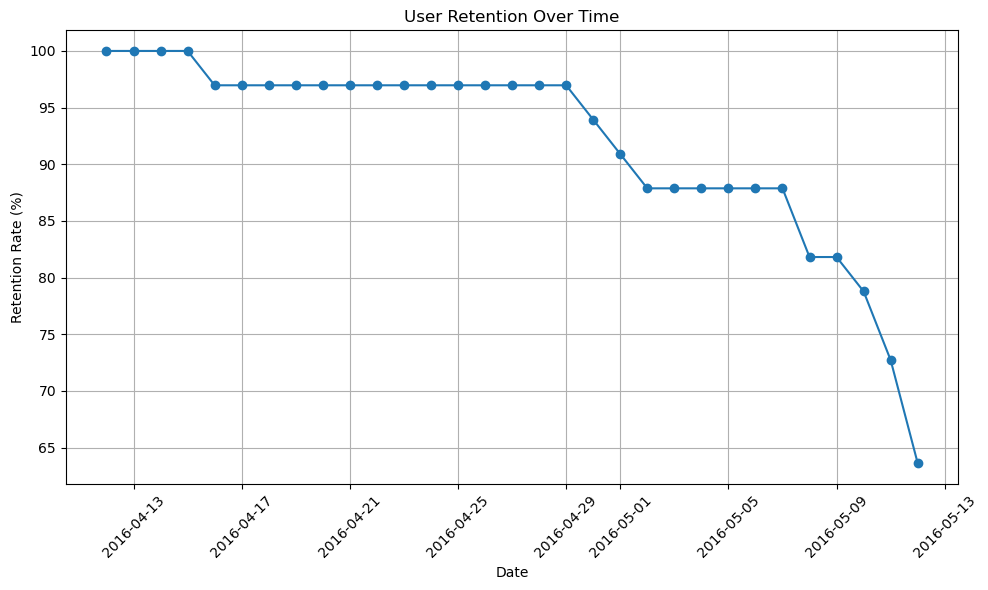

In [588]:
# Count the number of users active on each day
activity_counts = df['ActivityDate'].value_counts().sort_index()

# Get total number of unique users
total_users = df['Id'].nunique() 

# Calculate retention rates
retention_rates = (activity_counts / total_users) * 100

# Plotting the user retention chart
plt.figure(figsize=(10, 6))
plt.plot(retention_rates.index, retention_rates.values, marker='o')
plt.title('User Retention Over Time')
plt.xlabel('Date')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [590]:
print("Highest daily user logins:", activity_counts.max())
print("Lowest daily user logins:", activity_counts.min())

Highest daily user logins: 33
Lowest daily user logins: 21


While we can't fully conclude without multi-month data, we observe that user retention begins to decline overtime.

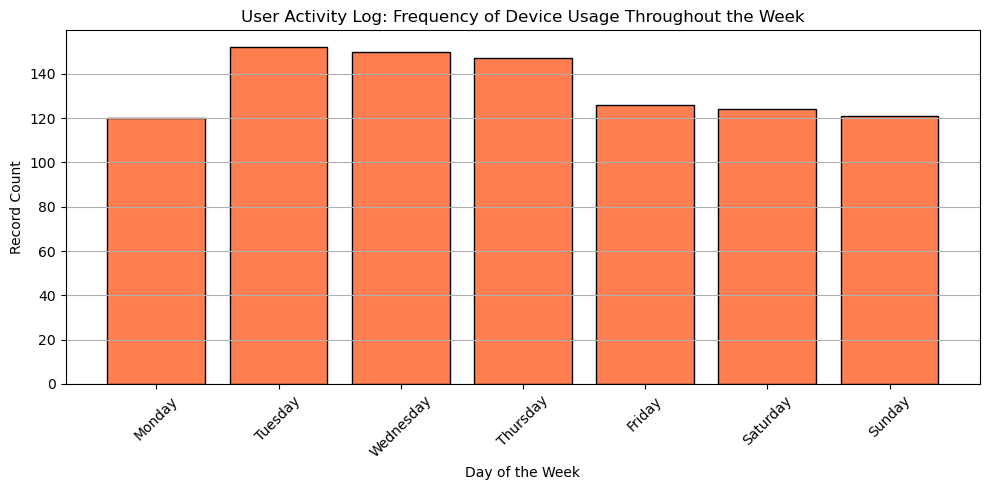

In [594]:
# Data Recorded During Each Day of Week
# More logs on Tuesday and Wednesday
record_count_per_day = df['DayOfWeek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    fill_value=0
).reset_index()

# Rename columns for clarity
record_count_per_day.columns = ['DayOfWeek', 'RecordCount']

# Plotting the count of data recorded for each day of the week
plt.figure(figsize=(10, 5))
plt.bar(record_count_per_day['DayOfWeek'], record_count_per_day['RecordCount'], 
        color='coral', edgecolor='black')
plt.title('User Activity Log: Frequency of Device Usage Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Record Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()

Users tend to prefer or remember tracking their activity on the app during the midweek period, specifically from Tuesday to Thursday. The frequency declines on Fridays, which continues into the weekends to Monday. (More users track midweek over weekend)

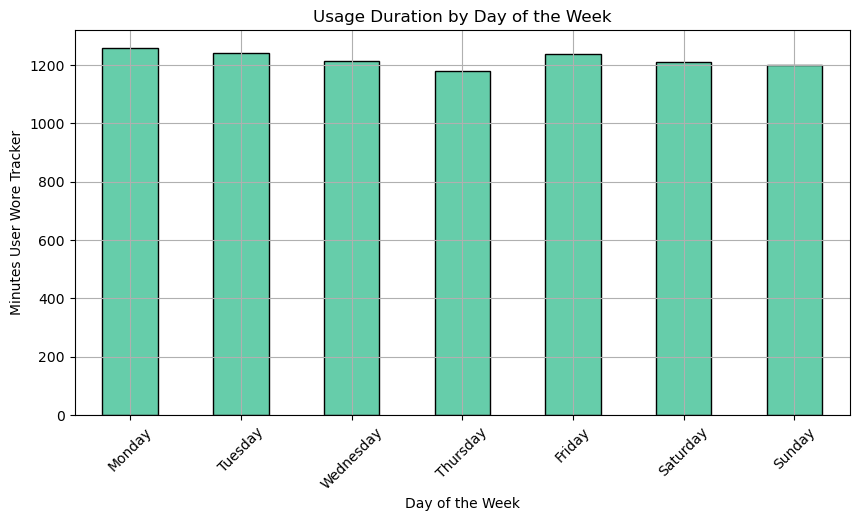

In [596]:
# Find when users are least active
usage_per_day = df.groupby('DayOfWeek')['TotalMinutes'].mean()

# Sort days to start from Monday
usage_per_day = usage_per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot graph
plt.figure(figsize=(10, 5))
usage_per_day.plot(kind='bar', color='mediumaquamarine', edgecolor='black')
plt.title("Usage Duration by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Minutes User Wore Tracker")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

The time users use the device each day is pretty similar throughout the week.

### Active Time

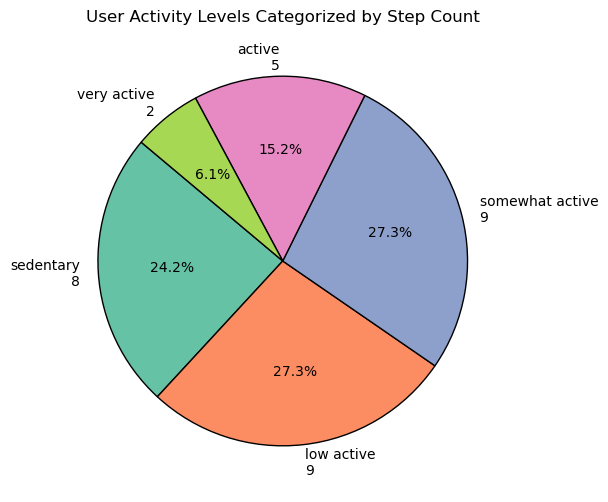

In [598]:
# User active categorization based on steps analysis from above
# active_style_counts = user_avg_steps['ActivityLevel'].value_counts().reindex(labels)

# Create the pie 
plt.figure(figsize=(6, 6))
plt.title("User Activity Levels Categorized by Step Count")
plt.pie(
    active_style_counts, 
    labels=[f"{label}\n{count}" for label, count in zip(active_style_counts.index, active_style_counts)],
    autopct='%1.1f%%', 
    colors=sns.color_palette('Set2'), 
    wedgeprops = {'edgecolor' : 'black'},
    startangle=140)
plt.show()

As seen in the summary statstics, users are not that active. Most spend their time in sedentary minutes. They do not spend a lot of time in active/very active minutes.

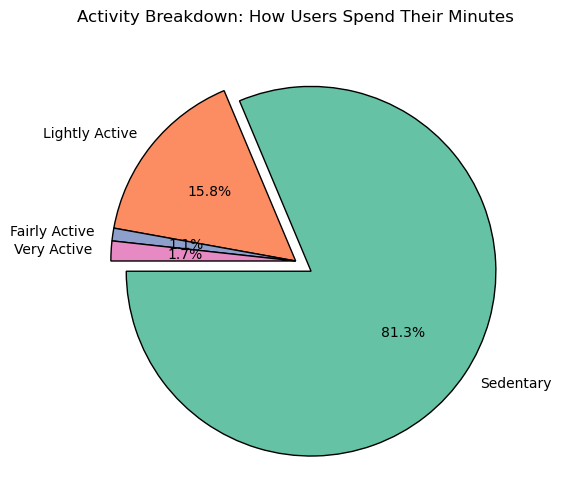

In [600]:
# Calculate total time in each active zone
sedentary = df['SedentaryMinutes'].sum()
light = df['LightlyActiveMinutes'].sum()
fair = df['FairlyActiveMinutes'].sum()
very = df['VeryActiveMinutes'].sum()

y = [sedentary, light, fair, very]
labels = ['Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active']
explode = (0.1, 0, 0, 0)

plt.figure(figsize=(6,6))
plt.title('Activity Breakdown: How Users Spend Their Minutes')
plt.pie(
    y, 
    labels=labels, 
    explode=explode, 
    autopct='%1.1f%%', 
    startangle=180, 
    wedgeprops = {'edgecolor' : 'black'},
    colors=sns.color_palette('Set2')
)
plt.show()

Most users spend 81.3% of their daily activity sedentary. This can suggest that the devices are not being used to track fitness activities based on the small percentage of fairly (1.1%) and very active activity (1.7%).

According to the [American Health Organization](https://www.heart.org/en/healthy-living/fitness/fitness-basics/aha-recs-for-physical-activity-in-adults), adults should aim for at least 150 minutes of moderate-intensity physical activity or 75 minutes of vigorous-intensity aerobic activity per week, or a combination of both. Reducing sedentary time is also encouraged to improve overall health.
- This suggests that adults spend 21.4 minutes being fairly active or 10.7 minutes being very active every day. Note: Users may vary their activity levels daily while still meeting recommended activity time.

In [602]:
# Find how many users meet the recommended activity levels each day
active_users = df[(df['FairlyActiveMinutes'] >= 21.4) | (df['VeryActiveMinutes'] >= 10.7)]

# active_user_counts_per_day = active_users.groupby(active_users['ActivityDate'])['Id'].nunique()
recommended_count = active_users.groupby(active_users['Id'])['ActivityDate'].nunique()
active_user_count = active_users['Id'].nunique()

print("Highest count of days a user met recommendation:", recommended_count.max())
print("Lowest count of days a user met recommendation:", recommended_count.min())

print(active_user_count, "users met the recommended activity level minutes at least once.")

Highest count of days a user met recommendation: 30
Lowest count of days a user met recommendation: 1
30 users met the recommended activity level minutes at least once.


In [604]:
# Count days users are active
recommended_count

Id
1503960366    30
1624580081     6
1644430081    16
1927972279     2
2022484408    28
2320127002     2
2347167796    12
2873212765    11
3372868164    11
3977333714    27
4020332650     4
4319703577     6
4388161847    22
4445114986     7
4558609924    16
4702921684    15
5553957443    17
5577150313    28
6117666160     2
6290855005     3
6775888955    11
6962181067    22
7007744171    18
7086361926    26
8053475328    29
8253242879    14
8378563200    23
8583815059    18
8792009665     1
8877689391    30
Name: ActivityDate, dtype: int64

This generalizes because I used an average time for each day when the recommended time is based on week. Users may get more or less exercise on a day but still make the recommended time. Since user may vary daily activity levels while still meeting recommended activity time, focused on steps instead of minutes.

### Active Days

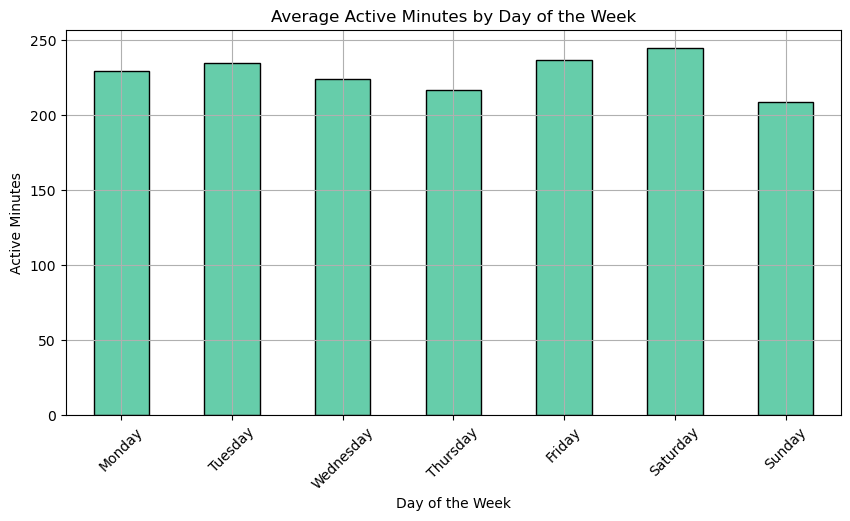

In [606]:
# Find average active minutes per day of week
active_per_day = df.groupby('DayOfWeek')['ActiveMinutes'].mean()
active_per_day = active_per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot graph
plt.figure(figsize=(10, 5))
active_per_day.plot(kind='bar', color='mediumaquamarine', edgecolor='black')
plt.title("Average Active Minutes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Active Minutes")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Based on the graphs, users are more active on Saturdays, as evidenced by less time spent in sedentary activity, more active minutes, and an increase in steps. This might likely be due to having more free time on the weekend.

<Figure size 1000x300 with 0 Axes>

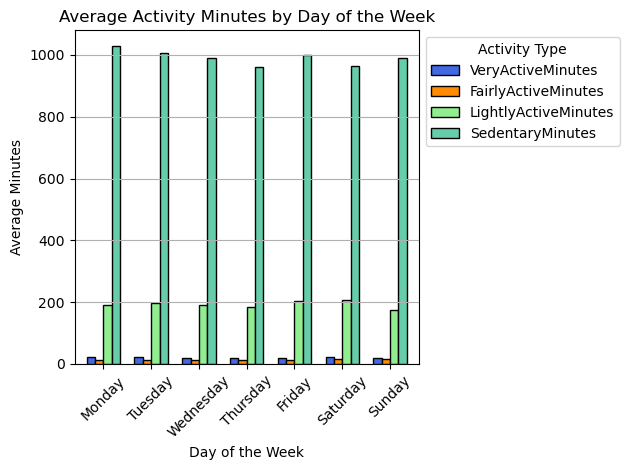

In [608]:
# Compare average minutes per day of week
activity_means = df.groupby('DayOfWeek')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
activity_means = activity_means.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot each activity type 
plt.figure(figsize=(10, 3))
activity_means.plot(kind='bar', stacked=False, color=['royalblue', 'darkorange', 'lightgreen', 'mediumaquamarine'], edgecolor='black', width=0.7)

plt.title("Average Activity Minutes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Minutes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Activity Type", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

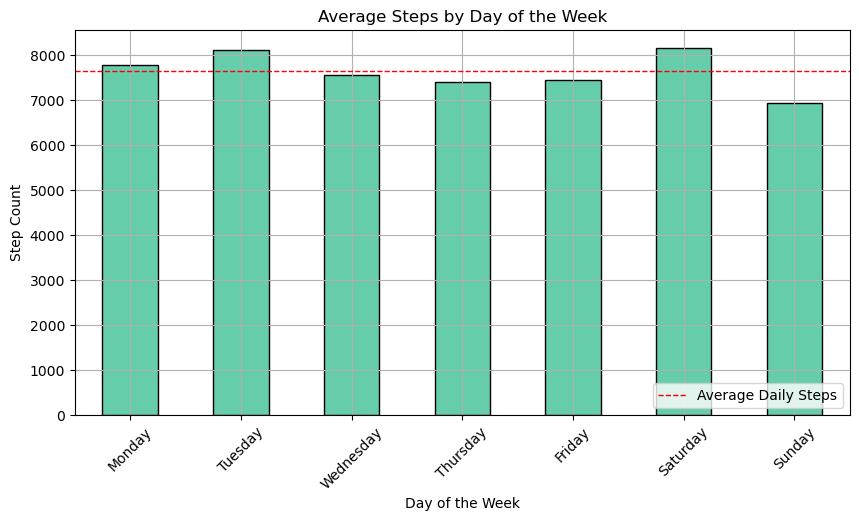

In [610]:
# Find average steps per day of week
steps_per_day = df.groupby('DayOfWeek')['TotalSteps'].mean()
avg_steps = df['TotalSteps'].mean()
steps_per_day = steps_per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot graph
plt.figure(figsize=(10, 5))
steps_per_day.plot(kind='bar', color='mediumaquamarine', edgecolor='black', label='_nolegend_')
plt.axhline(y=avg_steps, color='red', linestyle='--', linewidth=1, label='Average Daily Steps')

plt.title("Average Steps by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Step Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='lower right') 

plt.show()
# graph is similar to Average Active Minutes by Day of Week: df.groupby('DayOfWeek')['ActiveMinutes'].mean()

According to the [NIH](https://www.nih.gov/news-events/nih-research-matters/number-steps-day-more-important-step-intensity#:~:text=A%20goal%20of%2010%2C000%20steps,been%20done%20in%20older%20adults.), 
Adults who walked 8,000 steps or more each day had a lower risk of death, heart disease, and cancer over the next decade compared to those who walked only 4,000 steps daily, with step intensity not showing significant additional benefits. However, the overall average number of steps taken by users was 7,637, falling below the 8,000-step benchmark. Furthermore, the average steps taken each day of the week were frequently below 8,000, with only Monday, Tuesday, and Saturday surpassing this figure.

Based on the graphs, users are more active on Saturdays, as evidenced by less time spent in sedentary activity, more in active minutes, and an increase in steps. This might likely be due to having more free time on the weekend.

Sunday has the least steps ('lazy day')

Users are more active closer to the beginning of the week and Saturday.

### Hourly Steps

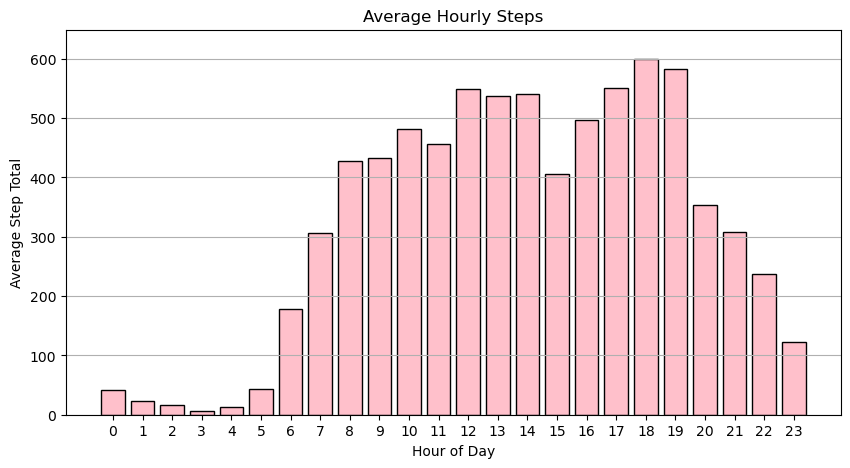

In [612]:
# Calculate average steps for each hour
average_hourly_steps = hourly_steps.groupby('Time')['StepTotal'].mean().reset_index()

# Create plot
plt.figure(figsize=(10, 5))
plt.bar(average_hourly_steps['Time'], average_hourly_steps['StepTotal'], color='pink', edgecolor='black')
plt.title('Average Hourly Steps')
plt.xlabel('Hour of Day')
plt.ylabel('Average Step Total')
plt.xticks(average_hourly_steps['Time'])  
plt.grid(axis='y')  
plt.ylim(0, average_hourly_steps['StepTotal'].max() + 50) 

plt.show()

Users tend to take the most steps between 12 PM to 2 PM and 5 PM to 7 PM, likely due to having lunch time and time after work.

In [614]:
# # Create the scatter plot
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.scatter(df['TotalSteps'], df['SedentaryMinutes'], alpha=0.6)

# # Add titles and labels
# plt.title('Scatter Plot of Total Steps vs Sedentary Minutes')
# plt.xlabel('Total Steps')
# plt.ylabel('Sedentary Minutes')

# # Show grid
# plt.grid(True)

# # Show the plot
# plt.show()

### Calories Burned for Every Step Taken

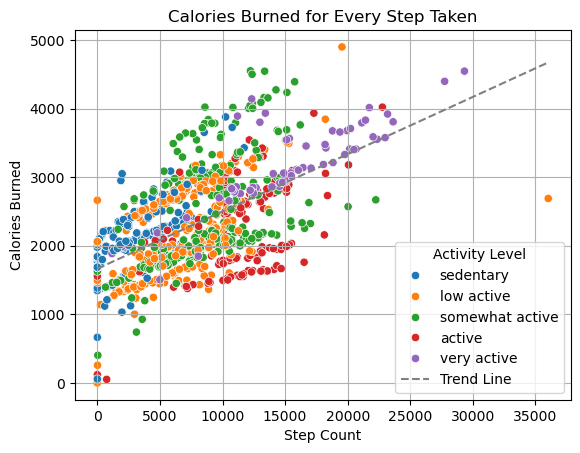

In [616]:
from scipy.stats import linregress

ax=sns.scatterplot(x='TotalSteps', y='Calories', data=df,hue='ActivityLevel')

# Scatter plot with color-coded points
plt.title("Calories Burned for Every Step Taken")
plt.xlabel('Step Count')
plt.ylabel('Calories Burned')

# Calculate linear regression
slope, intercept, _, _, _ = linregress(df.TotalSteps, df.Calories)

# Create line values for trend line
x_values = np.linspace(df.TotalSteps.min(), df.TotalSteps.max(), 100)
y_values = slope * x_values + intercept

# Plot the trend line
plt.plot(x_values, y_values, color='gray', linestyle='--', label='Trend Line')

plt.grid(True)
plt.legend(title='Activity Level')
plt.show()

There is a positive correlation between total steps and calories burned. The more steps taken, the more calories burned. Users that have a more active lifestyle are higher up on the graph. A few outliers are present in the scatter plot.

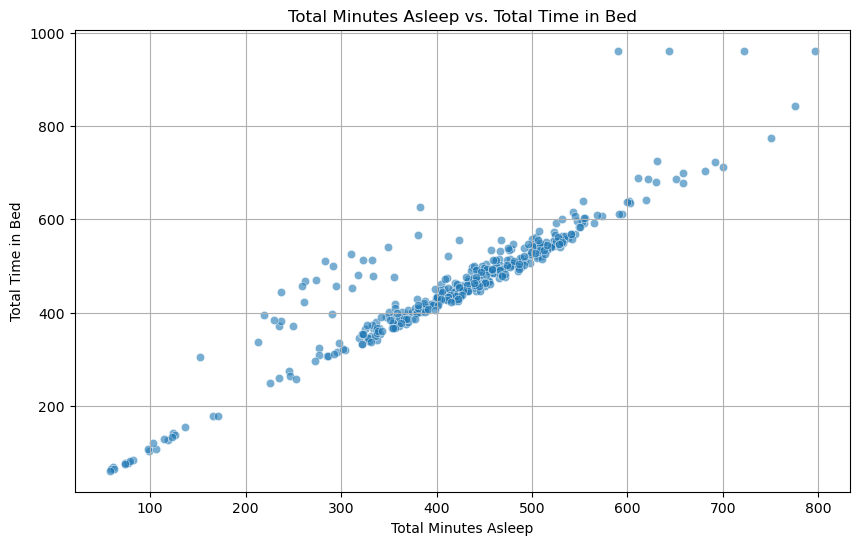

In [618]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sleep_day, x='TotalMinutesAsleep', y='TotalTimeInBed', alpha=0.6)
plt.title('Total Minutes Asleep vs. Total Time in Bed')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed')
plt.grid(True)
plt.show()

Increased time in bed correlate with longer sleep duration

### Sleep Vs. Active Minutes

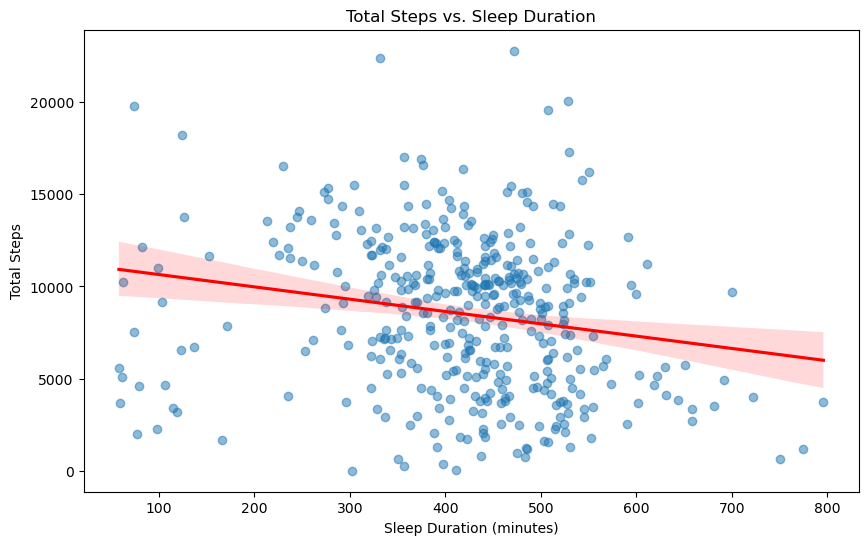

In [660]:
# Scatter plot with trend line
# Using merged_data dataframe that combined df and sleep_day
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_data, x='TotalMinutesAsleep', y='TotalSteps', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Total Steps vs. Sleep Duration')
plt.xlabel('Sleep Duration (minutes)')
plt.ylabel('Total Steps')
plt.show()

In [662]:
print(f'Correlation between Total Steps and Sleep Duration: {sleep_corr}')

Correlation between Total Steps and Sleep Duration: -0.19034391666763165


In [664]:
sleep_day.insert(loc=2, column="DayOfWeek", value=sleep_day["SleepDate"].dt.day_name())

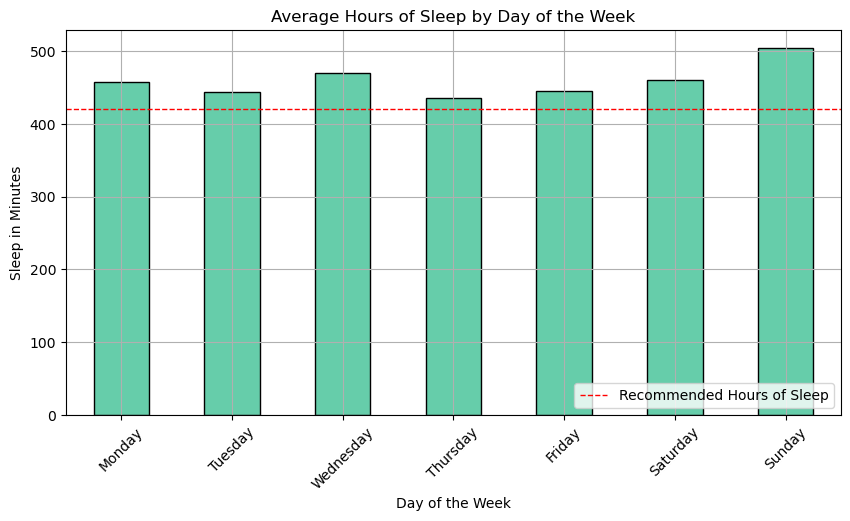

In [668]:
# Find when users are least active
sleep_per_day = sleep_day.groupby('DayOfWeek')['TotalTimeInBed'].mean()

# Sort days to start from Monday
sleep_per_day = sleep_per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot graph
plt.figure(figsize=(10, 5))
sleep_per_day.plot(kind='bar', color='mediumaquamarine', edgecolor='black', label='_nolegend_')
plt.axhline(y=420, color='red', linestyle='--', linewidth=1, label='Recommended Hours of Sleep')

plt.title("Average Hours of Sleep by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Sleep in Minutes")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='lower right') 

plt.show()

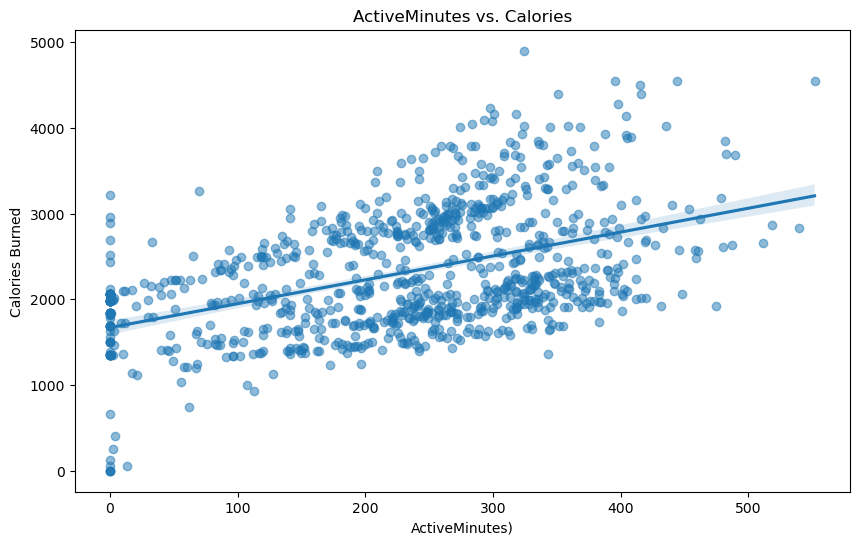

In [684]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='ActiveMinutes', y='Calories', scatter_kws={'alpha':0.5})
plt.title('ActiveMinutes vs. Calories')
plt.xlabel('ActiveMinutes)')
plt.ylabel('Calories Burned')
plt.show()

## 6. Act

#### Key Findings:
- Users spend most of their day being sedentary, with an average of 81.3% of their time inactive, recording more daily activities than fitness.
- Physical activity levels are low, with users taking an average of 7,638 daily steps—below the recommended 10,000. Users engage in light exercise, spending only 1.1% of their day being fairly active and 1.7% being very active.
- User tracking is inconsistent, with retention dropping below 65% by the end of the data recording period and many users failing to log activity daily.
- More users track their activity during midweek (Tuesday to Thursday), with frequency declining toward the weekend, possibly due to motivation fatigue.

Despite being a wellness product, users engage in minimal physical activity and remain largely inactive. Additionally, they are not fully utilizing the product's fitness tracking purpose, with inconsistent tracking patterns indicating challenges in long-term retention and habit formation

Because [goal-setting is linked to greater success in weight loss and a lower risk of dropping out](https://pmc.ncbi.nlm.nih.gov/articles/PMC10357317/), encourage users to set goals and draw motivation from their health and fitness journey. [Incorporating habit-formation strategies—focusing on simple and sustainable methods—can drive long-term behavioral changes](https://pmc.ncbi.nlm.nih.gov/articles/PMC3505409/), increasing app engagement and satisfaction.

**Notes for a women-focused wellness brand**

Bellabeat should address specific needs and motivations unique to women to better connect with its target audience. Women often seek [holistic wellness](https://www.forbes.com/sites/jesscording/2024/11/11/stronger-not-smaller-the-new-era-of-womens-fitness/)--not just fitness, but mental health, balance, and self-care. Frame the brand around feeling good, not just hitting metrics.

### Product and Engagement Recommendations:

1. Movement prompts and notifications to combat sedentary behavior
- Smart nudges: subtle reminders for short movement breaks and inactivity (e.g., “How about a quick walk?”, “Sitting for long? Time for a 5-minute stretch”)
- Leverage peak activity times: promote activity when users are most active/have tiem (lunch, end of day, end of week)– “Feeling low on steps? Try a quick 5-minute stroll.”
- Midweek motivation: boost motivation during week slumps with encouraging messages and personalized suggestions (highlight progress rather than intensity to make users feel successful by simply breaking up inactivity–“You walked 500 more steps today than yesterday!'"

2. Short achievable challenges to incentivize activity tracking 
- Time-efficient realistic activities and balance: cater to busy schedules and prevent overwhelming users since they are mostly inactive (e.g., “Try our 5 min movement boost”, desk-friendly exercises)
- Flexible and adaptable goals (e.g., customized fitness plans based on energy levels throughout the menstrual cycle)
- Weekly/monthly focus themes: celebrate specific health milestones (e.g., “Movement March”, “Sleep Improvement January”, “Move-It Wednesday”)
- Personalized progress visualization: motivate users by comparing activity to the recommended target. Adjust goals based on trends to encourage small, attainable increases
  
3. Retention strategies, incentives, and accountability (community and emotional connection)
- Rewards and incentives: reward consistency over perfection with positive reinforcements, and streaks (e.g., “Life gets busy that okay, let's get back on track tomorrow, ‘Weekend Warrior Badge’, product discounts/access)
- Gamification: add fun elements like milestone badges, friend challenges/community groups, and offer a variety of exercises
- Supportive communities: women are often motivated by social connection and shared experiences rather than pure competition (e.g., private groups for busy moms or women with shared goals)
- Storytelling: resonate with personal experiences by highlighting real user stories to add to the abstract data points
- Health education and wellness tips: informative content on the benefits to help understand current habits and encourage (e.g. how walking can boost mental clarity and reduce stress or the connection between sleep and wellness)

4. Prioritize holistic wellness/address unique needs
- Comprehensive health monitoring/wellness score: Acknowledge other wellness goals, encouraging regular physical activity as part of a broader health strategy (e.g., stress management, mental health, mindfulness routine, mood, energy, sleep recovery)
- Tailor wellness plans to women's unique needs (e.g. hormonal health)

**Future Considerations:**
- Expand data collection for improved analysis (larger user base over an extended period, demographic information)
- Study sleep engagement and wearability: relatively low number of users engaged in the sleep tracking feature, highlighting potential gaps in awareness or perceived value (automatic sleep detection). This could also be due to device wearability (uncomfortable during sleep)
- Address usability: inconsistent use could be due to poor design, difficult interface or features, battery life (survey)